target for classification task will be converted variable

In [57]:
import pandas as pd
import numpy as np


In [58]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')

In [59]:
data.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


Data preparation

Check if the missing values are presented in the features.

If there are missing values:

For categorical features, replace them with 'NA'

For numerical features, replace with with 0.0

In [60]:
data.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [62]:
target = 'converted'
# replace categorical missing values with 'NA' and numerical missing values with 0
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols.drop(target)
categorical_cols, numerical_cols

(Index(['lead_source', 'industry', 'employment_status', 'location'], dtype='object'),
 Index(['number_of_courses_viewed', 'annual_income', 'interaction_count',
        'lead_score'],
       dtype='object'))

In [63]:
df = data.copy()
df[categorical_cols] = df[categorical_cols].fillna('NA')
df[numerical_cols] = df[numerical_cols].fillna(0)
df.isna().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

Question 1

What is the most frequent observation (mode) for the column industry?

In [64]:
df.industry.value_counts().sort_values(ascending=False)

industry
retail           203
finance          200
other            198
healthcare       187
education        187
technology       179
manufacturing    174
NA               134
Name: count, dtype: int64

In [65]:
df.industry.mode()

0    retail
Name: industry, dtype: object

Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

<AxesSubplot: >

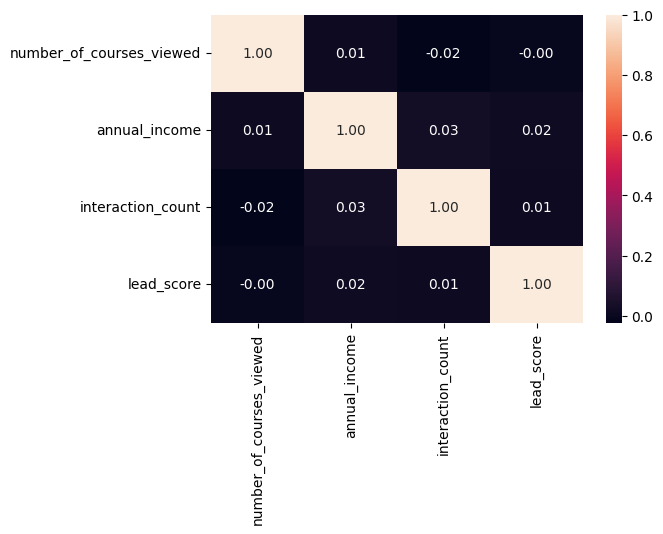

In [66]:
df_corr = df[numerical_cols].corr()

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr, annot=True, fmt=".2f")


Split the data

Split your data in train/val/test sets with 60%/20%/20% distribution.

Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.

Make sure that the target value converted is not in your dataframe.

In [67]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=[target])
y = df[target]

np.random.seed(42)
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)
X_train.shape[0]/X.shape[0], X_val.shape[0]/X.shape[0], X_test.shape[0]/X.shape[0]

X_train.reset_index(drop=True,inplace=True), X_val.reset_index(drop=True,inplace=True), X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True), y_val.reset_index(drop=True,inplace=True), y_test.reset_index(drop=True,inplace=True)

(None, None, None)

Question 3

Calculate the mutual information score between converted and other categorical variables in the dataset. Use the training set only.

Round the scores to 2 decimals using round(score, 2).

Which of these variables has the biggest mutual information score?

In [68]:
from sklearn.metrics import mutual_info_score

In [69]:

for col in categorical_cols:
    mi = mutual_info_score(X_train[col], y_train)
    print(f'{col}: {mi:.3f}')

lead_source: 0.028
industry: 0.015
employment_status: 0.018
location: 0.003


Question 4

Now let's train a logistic regression.

Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.

Fit the model on the training dataset.

To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [71]:
onehot = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_cat = onehot.fit_transform(X_train[categorical_cols].values)
X_val_cat = onehot.transform(X_val[categorical_cols].values)

X_train_num = X_train[numerical_cols].values
X_val_num = X_val[numerical_cols].values




C:\Users\Nicolas\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [72]:
X_train = np.column_stack([X_train_num, X_train_cat])

In [73]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [74]:
X_val = np.column_stack([X_val_num, X_val_cat])

In [75]:
y_pred = model.predict_proba(X_val)[:, 1]
print(accuracy_score(y_val, y_pred >= 0.5))
round(accuracy_score(y_val, y_pred >= 0.5), 2)

0.7431506849315068


0.74

In [76]:
acc_all_features = accuracy_score(y_val, y_pred >= 0.5)
acc_all_features

0.7431506849315068

Question 5

Let's find the least useful feature using the feature elimination technique.

Train a model using the same features and parameters as in Q4 (without rounding).

Now exclude each feature from this set and train a model without it. Record the accuracy for each model.

For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

In [77]:

def prep_and_train(X_train, y_train, col_to_drop=None, C = 1.0):


    target = 'converted'

    X = df.drop(columns=[target])
    y = df[target]

    if col_to_drop:
        X.drop(columns=[col_to_drop], inplace=True)

    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_cols = X.select_dtypes(include=['number']).columns

    print(categorical_cols)
    print(numerical_cols)
    
    np.random.seed(42)
    X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)

        
    onehot = OneHotEncoder(sparse=False, handle_unknown='ignore')
    X_train_cat = onehot.fit_transform(X_train[categorical_cols].values)
    X_val_cat = onehot.transform(X_val[categorical_cols].values)


    X_train_num = X_train[numerical_cols].values
    X_val_num = X_val[numerical_cols].values

    X_train = np.column_stack([X_train_num, X_train_cat])

    model = LogisticRegression(solver='liblinear', C= C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    X_val = np.column_stack([X_val_num, X_val_cat])

    y_pred = model.predict_proba(X_val)[:, 1]

    return {'accuracy': accuracy_score(y_val, y_pred >= 0.5), 'col_to_drop': col_to_drop, "C":C}

In [78]:
cols_to_drop = ['industry', 'employment_status', 'lead_score']

acc = {}
for col in cols_to_drop:
    result = prep_and_train(X_train, y_train, col_to_drop=col)
    print("results: \n",result)
    # add accuracy to the dict
    acc[col] = acc_all_features -  result['accuracy']

    


C:\Users\Nicolas\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Nicolas\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Nicolas\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Index(['lead_source', 'employment_status', 'location'], dtype='object')
Index(['number_of_courses_viewed', 'annual_income', 'interaction_count',
       'lead_score'],
      dtype='object')
results: 
 {'accuracy': 0.7431506849315068, 'col_to_drop': 'industry', 'C': 1.0}
Index(['lead_source', 'industry', 'location'], dtype='object')
Index(['number_of_courses_viewed', 'annual_income', 'interaction_count',
       'lead_score'],
      dtype='object')
results: 
 {'accuracy': 0.7465753424657534, 'col_to_drop': 'employment_status', 'C': 1.0}
Index(['lead_source', 'industry', 'employment_status', 'location'], dtype='object')
Index(['number_of_courses_viewed', 'annual_income', 'interaction_count'], dtype='object')
results: 
 {'accuracy': 0.7431506849315068, 'col_to_drop': 'lead_score', 'C': 1.0}


In [79]:
acc

{'industry': 0.0,
 'employment_status': -0.003424657534246589,
 'lead_score': 0.0}

Question 6

Now let's train a regularized logistic regression.

Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].

Train models using all the features as in Q4.

Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these C leads to the best accuracy on the validation set?

In [ ]:
C = [0.01, 0.1, 1, 10, 100]


acc = {}
for C_reg in C:
    result = prep_and_train(X_train, y_train, C=C_reg)
    print("results: \n",result)
    # add accuracy to the dict
    acc[result['C']] = result['accuracy']

    


Index(['lead_source', 'industry', 'employment_status', 'location'], dtype='object')
Index(['number_of_courses_viewed', 'annual_income', 'interaction_count',
       'lead_score'],
      dtype='object')
results: 
 {'accuracy': 0.7431506849315068, 'col_to_drop': None, 'C': 0.01}
Index(['lead_source', 'industry', 'employment_status', 'location'], dtype='object')
Index(['number_of_courses_viewed', 'annual_income', 'interaction_count',
       'lead_score'],
      dtype='object')
results: 
 {'accuracy': 0.7431506849315068, 'col_to_drop': None, 'C': 0.1}
Index(['lead_source', 'industry', 'employment_status', 'location'], dtype='object')
Index(['number_of_courses_viewed', 'annual_income', 'interaction_count',
       'lead_score'],
      dtype='object')
results: 
 {'accuracy': 0.7431506849315068, 'col_to_drop': None, 'C': 1}
Index(['lead_source', 'industry', 'employment_status', 'location'], dtype='object')
Index(['number_of_courses_viewed', 'annual_income', 'interaction_count',
       'lead_sco

C:\Users\Nicolas\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Nicolas\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Nicolas\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Nicolas\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning:

In [81]:
acc

{0.01: 0.7431506849315068,
 0.1: 0.7431506849315068,
 1: 0.7431506849315068,
 10: 0.7431506849315068,
 100: 0.7431506849315068}

In [83]:
print(f'best accuracy is {max(acc, key=acc.get)}.')


best accuracy is 0.01.
